(Age             55.850394
BMI             27.215728
Glucose         95.700787
Insulin          9.557037
HOMA             2.547656
Leptin          25.621757
Adiponectin      9.831036
Resistin        14.085466
MCP.1          511.389102
dtype: float64, Age             16.351826
BMI              5.008564
Glucose         22.696869
Insulin          9.738491
HOMA             3.513617
Leptin          18.705080
Adiponectin      6.671655
Resistin        12.040539
MCP.1          341.194930
dtype: float64, Age                   24
BMI                18.37
Glucose               60
Insulin            2.432
HOMA            0.467409
Leptin             4.311
Adiponectin      1.65602
Resistin            3.21
MCP.1             45.843
Status         cancerous
dtype: object, Age                 89
BMI            38.5788
Glucose            201
Insulin          58.46
HOMA           25.0503
Leptin           90.28
Adiponectin      38.04
Resistin          82.1
MCP.1          1698.44
Status         healthy
dtyp

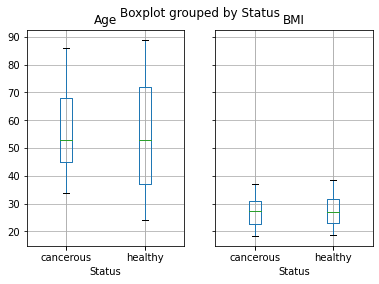

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import preprocessing

#Reading data in
data = pd.read_excel("clinical_dataset.xlsx")
#Storing the headings of the data
headings = data.columns 
#Data analysis
df = pd.DataFrame(data)
mean = df.mean(axis=0)
min = df.min(axis=0)
max = df.max(axis=0)
std = df.std(axis=0)
isMissing = df.isna()
stats = mean, std, min, max
#Output the statistics
print(stats) 
#Normalising the data using the MinMaxScaler
dfNorm = df[df.columns[0:9]]
status = df[df.columns[-1:]]
headingsNorm = dfNorm.columns
minMaxScaler = preprocessing.MinMaxScaler()
scaled = minMaxScaler.fit_transform(dfNorm)
dfNorm = pd.DataFrame(scaled, columns = headingsNorm)
dfNorm['Status'] = status
#Plotting the data
groups = df.groupby('Status')
boxplot = df.boxplot(column=['Age','BMI'],by='Status')

Text(0.5, 0, 'BMI')

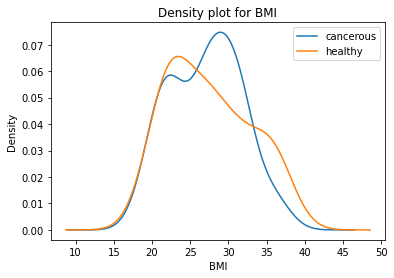

In [52]:
#Density plot for BMI
densityplot = df.groupby('Status').BMI.plot.kde(legend='True')
plt.title('Density plot for BMI')
plt.xlabel('BMI')

Healthy: Status    57
dtype: int64 Cancerous Status    57
dtype: int64
Healthy: Status    6
dtype: int64 Cancerous Status    7
dtype: int64
ANN Results:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.71      0.83      0.77         6

    accuracy                           0.77        13
   macro avg       0.77      0.77      0.77        13
weighted avg       0.78      0.77      0.77        13



C:\Users\h8bmf\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\h8bmf\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\h8bmf\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\h8bmf\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

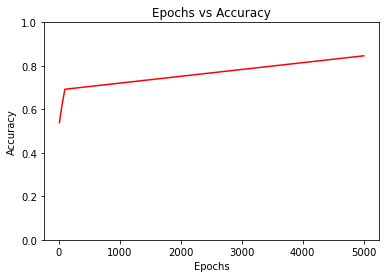

<Figure size 432x288 with 0 Axes>

In [57]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

#Preparing data
df.Status.replace(['healthy', 'cancerous'],[1, 0], inplace=True)
x = df.iloc[:, 0:9]
y = df.iloc[:, -1:]
#Splitting the data and printing examples
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
print("Healthy: " + str(y_train.sum()) + " Cancerous " + str(len(y_train) - y_train.sum()))
print("Healthy: " + str(y_test.sum()) + " Cancerous " + str(len(y_test) - y_test.sum()))
#Normalising the data using StandardScaler
stand = preprocessing.StandardScaler()
stand.fit(x_train)
x_train = stand.transform(x_train)
x_test = stand.transform(x_test)
#MLP Classifier to predict data
mlp = MLPClassifier(hidden_layer_sizes=(500,500), max_iter=1000, activation='logistic')
setattr(mlp, "out_activation_", "logistic")
#Fitting the data
mlp.fit(x_train, y_train.values.ravel())
#Storing the predicted data
output = mlp.predict(x_test)
print("ANN Results:")
print(classification_report(y_test, output))
#Changing the number of iterations
epochs = [10, 50, 100, 5000]
outputs = list()
for epoch in range(len(epochs)):
    mlp = MLPClassifier(hidden_layer_sizes=(500,500), max_iter=epochs[epoch], activation='logistic', tol=0)
    setattr(mlp, "out_activation_", "logistic")
    mlp.fit(x_train, y_train.values.ravel())
    output = mlp.predict(x_test)
    outputs.append(accuracy_score(y_test, output))
#Plotting epochs
plt.title("Epochs vs Accuracy")
plt.plot(epochs, outputs, color="r")
plt.ylim(ymin=0,ymax=1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show
plt.figure()

In [66]:
from sklearn.ensemble import RandomForestClassifier
#Numbers of trees = 1000, Node = 5
forest5 = RandomForestClassifier(n_estimators=1000, min_samples_leaf=5)
forest5.fit(x_train, y_train.values.ravel())
forest5out = forest5.predict(x_test)
print("Numbers of trees = 1000, Node = 5 Results:")
print(classification_report(y_test,forest5out))

#Numbers of trees = 1000, Node = 50
forest50 = RandomForestClassifier(n_estimators=1000, min_samples_leaf=50)
forest50.fit(x_train, y_train.values.ravel())
forest50out = forest50.predict(x_test)
print("Numbers of trees = 1000, Node = 50 Results:")
print(classification_report(y_test,forest50out))

Numbers of trees = 1000, Node = 5 Results:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.80      0.67      0.73         6

    accuracy                           0.77        13
   macro avg       0.78      0.76      0.76        13
weighted avg       0.77      0.77      0.77        13

Numbers of trees = 1000, Node = 50 Results:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70         7
           1       0.00      0.00      0.00         6

    accuracy                           0.54        13
   macro avg       0.27      0.50      0.35        13
weighted avg       0.29      0.54      0.38        13



C:\Users\h8bmf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


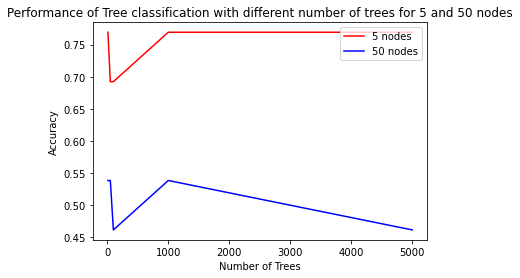

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [67]:
out5 = list()
out50 = list()
treeCount = [10, 50, 100, 1000, 5000]
for tree in range(len(treeCount)):
    forest5 = RandomForestClassifier(n_estimators=treeCount[tree], min_samples_leaf=5)
    forest5.fit(x_train, y_train.values.ravel())
    forest5out = forest5.predict(x_test)
    out5.append(accuracy_score(y_test,forest5out))
    forest50 = RandomForestClassifier(n_estimators=treeCount[tree], min_samples_leaf=50)
    forest50.fit(x_train, y_train.values.ravel())
    forest50out = forest50.predict(x_test)
    out50.append(accuracy_score(y_test,forest50out))
plt.plot(treeCount,out5,'r')
plt.plot(treeCount,out50,'b')
plt.title('Performance of Tree classification with different number of trees for 5 and 50 nodes')
plt.legend(('5 nodes','50 nodes'),loc="upper right")
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.show()
plt.figure()

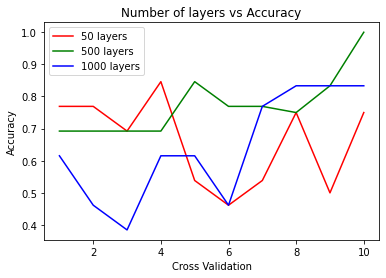

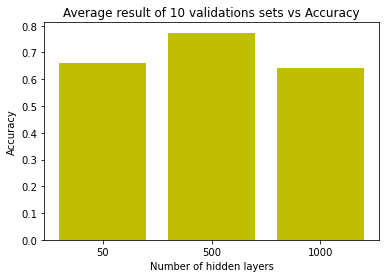

ANN Results:
[0.6615384615384615, 0.7737179487179486, 0.6423076923076924]


<Figure size 432x288 with 0 Axes>

In [80]:
#KFold Splitting
from sklearn.model_selection import StratifiedKFold, cross_val_score
kFold =  StratifiedKFold(n_splits=10, shuffle=True) #10 fold K-Folds
#Setup
ANNLayer = [50,500,1000]
noOfTree= [20,500,10000]
xAxis = [1,2,3,4,5,6,7,8,9,10]
colours = ['r','g','b']
colour = 0
ANNLayerResults = list()
treeResults = list()
#ANN Calculations
for layer in ANNLayer:
    mlp = MLPClassifier(hidden_layer_sizes=(layer,layer), max_iter=1000, activation='logistic')
    setattr(mlp, "out_activation_", "logistic")
    output = cross_val_score(mlp, x, y, cv=kFold, n_jobs=-1)
    plt.plot(xAxis, output, colours[colour])
    ANNLayerResults.append(output.mean())
    colour = colour+1
#Graph for analysising the numbers of layers against the accuracy
plt.title("Number of layers vs Accuracy")
plt.legend(('50 layers','500 layers','1000 layers'),loc="upper left")
plt.xlabel("Cross Validation")
plt.ylabel("Accuracy")
plt.show()
plt.figure()
#Bar chart for the averages of the ANN
plt.bar(['50', '500', '1000'],ANNLayerResults,color='y')
plt.title("Average result of 10 validations sets vs Accuracy")
plt.xlabel("Number of hidden layers")
plt.ylabel("Accuracy")
plt.show()
plt.figure()
#ANN results
print("ANN Results:")
print(ANNLayerResults)
colour=0

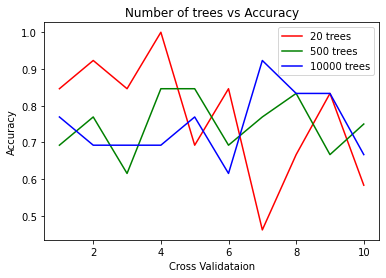

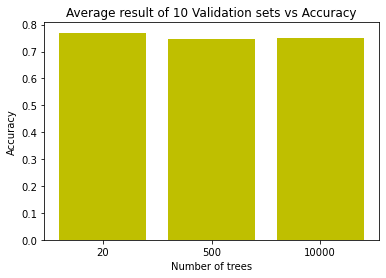

Tree Results:
[0.7698717948717948, 0.7480769230769231, 0.7487179487179487]


<Figure size 432x288 with 0 Axes>

In [79]:
#Tree calculations
for tree in noOfTree:
    clf = RandomForestClassifier(n_estimators=tree, min_samples_leaf=5)
    output = cross_val_score(clf, x, y, cv=kFold, n_jobs=-1)
    plt.plot(xAxis, output, colours[colour])
    treeResults.append(output.mean())
    colour = colour+1
#Graph plotting for the number of trees against the accuracy
plt.title("Number of trees vs Accuracy")
plt.legend(('20 trees','500 trees', '10000 trees'),loc="upper right")
plt.xlabel("Cross Validataion")
plt.ylabel("Accuracy")
plt.show()
plt.figure()
#Bar Chart for the averages of performance
plt.bar(['20','500','10000'],treeResults,color="y")
plt.title("Average result of 10 Validation sets vs Accuracy")
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.show()
plt.figure()
#Tree results
print("Tree Results:")
print(treeResults)
colour=0